# Library

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random

# k-means 함수정의

In [10]:
# center값 기준 거리 정렬 함수
def calculate_dist(p1, p2):
    dist = np.sqrt((p1[0]-p2[0])**2 +(p1[1]-p2[1])**2)
    return dist

#kmeans 함수 생성 kmeans(data,center,k(센터 개수))
def Kmeans(datas,center,k):
    
    datas = np.asarray(datas)
    # 기존 센터값 받아오기
    center = np.asarray(center)
    # 거리값 저장할 array 생성
    dist = np.zeros(shape=(len(datas),k))
    
    # 거리측정
    for i in range(k):
        for j,data in enumerate(datas):
            dist[j,i] = calculate_dist(center[i],data)
    
    # 클러스터 재정의
    for i in range(len(datas)):
        # 거리 최소값 인덱싱
        # 클러스터 위치(data[:,2]) 에 클러스터 재정의
        datas[i,2] = np.argmin(dist[i])     
    
    # center 재정의
    for i in range(k):
        # 클러스터  i인 데이터를 필터링 하여 x,y 평균 측정
        filtered_data = datas[np.where(datas[:,2]==i)]
        center[i,0] = np.mean(filtered_data[:,0])
        center[i,1] = np.mean(filtered_data[:,1])
    
    return center

# Data

In [28]:
# 랜덤값 센터값 기준으로 랜덤값 생성
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

data = np.random.randn(10,2) + center_1
data = np.concatenate((data, np.random.randn(10,2) + center_2))
data = np.concatenate((data, np.random.randn(10,2) + center_3))

#0으로 된 30개의 행 생성 data 2열에 붙이기
cluster = np.zeros(shape=(len(data),1))

data = np.concatenate((data,cluster),axis=1)
#data = np.hstack((data,cluster)) # 같은 표현

# 만들 센터 개수 생성
k = 4

# 센터 랜덤값 지정

In [29]:
center =np.zeros(shape=(k,2))
x_min = int(np.min(data[:,0]))
x_max = int(np.max(data[:,0]))
y_min = int(np.min(data[:,1]))
y_max = int(np.max(data[:,1]))
    
# 랜덤으로 뽑은 데이터 범위 내에서의 센터 정렬 
for i in range(k):
    center[i] = [random.randrange(x_min,x_max),random.randrange(y_min,y_max)]

# 랜덤 센터값 확인

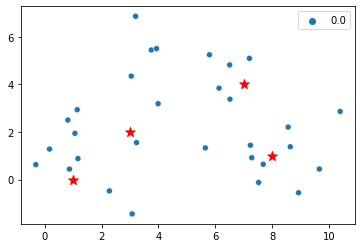

In [30]:
sns.scatterplot(x=data[:,0],y=data[:,1],hue=data[:,2])
for i in range(k):
    
    plt.scatter(center[i,0], center[i,1], marker='*', c='r', s=100)

0 번째 center 정렬값 : 
 [[8. 1.]
 [7. 4.]
 [3. 2.]
 [1. 0.]]


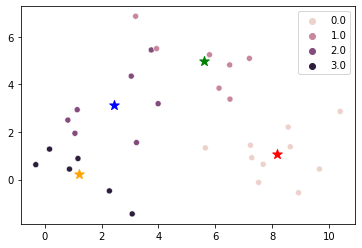

1 번째 center 정렬값 : 
 [[8.1523349  1.05775044]
 [5.60954366 4.9662715 ]
 [2.43326536 3.13378727]
 [1.20890503 0.22132181]]


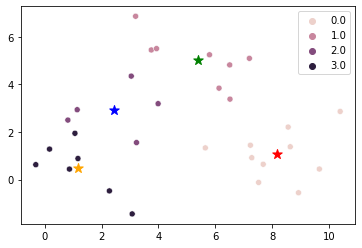

2 번째 center 정렬값 : 
 [[8.1523349  1.05775044]
 [5.37696371 5.02662157]
 [2.44390645 2.90818331]
 [1.18826449 0.46777901]]


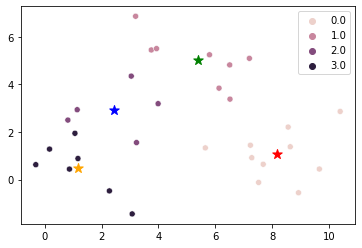

3 번째 center 정렬값 : 
 [[8.1523349  1.05775044]
 [5.37696371 5.02662157]
 [2.44390645 2.90818331]
 [1.18826449 0.46777901]]


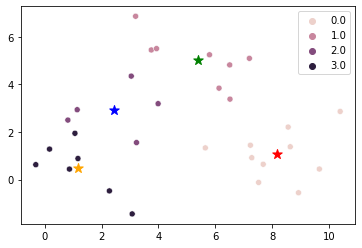

4 번째 center 정렬값 : 
 [[8.1523349  1.05775044]
 [5.37696371 5.02662157]
 [2.44390645 2.90818331]
 [1.18826449 0.46777901]]


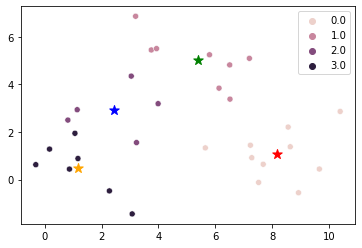

5 번째 center 정렬값 : 
 [[8.1523349  1.05775044]
 [5.37696371 5.02662157]
 [2.44390645 2.90818331]
 [1.18826449 0.46777901]]


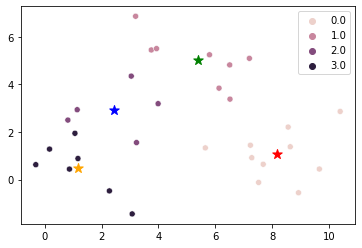

6 번째 center 정렬값 : 
 [[8.1523349  1.05775044]
 [5.37696371 5.02662157]
 [2.44390645 2.90818331]
 [1.18826449 0.46777901]]


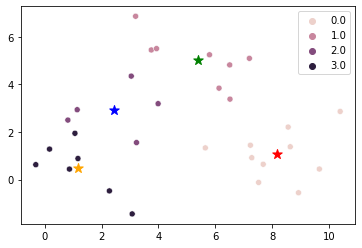

7 번째 center 정렬값 : 
 [[8.1523349  1.05775044]
 [5.37696371 5.02662157]
 [2.44390645 2.90818331]
 [1.18826449 0.46777901]]


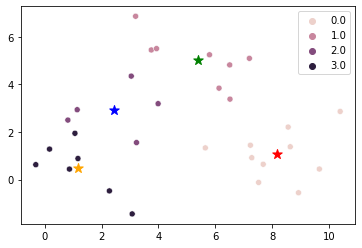

In [31]:
# learing_rate 돌릴 횟수
count = 0

# learning_rate 생성
# 8 번 돌리면 거의 해결
learning_rate = 8

color = ['red','green','blue','orange','yellow','skyblue','smokewhite']

while count<learning_rate:
    before_center=np.copy(center)
    center = Kmeans(data,center,k)
    print(count,"번째 center 정렬값 : \n",before_center)
    count+=1
    # kmean 출력
    sns.scatterplot(x=data[:,0],y=data[:,1],hue=data[:,2])
    for i in range(k):
        plt.scatter(center[i,0], center[i,1], marker='*', c=color[i], s=100)
    plt.show()